In [1]:
import pandas as pd 
import  matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("salary_for_clustering.csv")
df.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


Text(0, 0.5, 'salary')

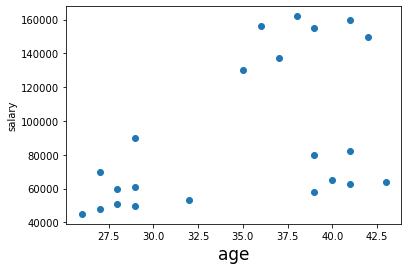

In [3]:
plt.scatter(df["Age"],df["Income($)"])
plt.xlabel("age",fontsize = 17)
plt.ylabel("salary")

In [4]:
from sklearn.cluster import KMeans

In [5]:
km = KMeans(n_clusters = 3)

In [6]:
y_predict = km.fit_predict(df[["Age","Income($)"]])

In [7]:
y_predict

array([0, 0, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2])

In [8]:
df["cluster"] = y_predict

In [9]:
df.head()

,Name,Age,Income($),cluster
0,Rob,27,70000,0
1,Michael,29,90000,0
2,Mohan,29,61000,2
3,Ismail,28,60000,2
4,Kory,42,150000,1


In [10]:
km.cluster_centers_

array([[3.40000000e+01, 8.05000000e+04],
       [3.82857143e+01, 1.50000000e+05],
       [3.29090909e+01, 5.61363636e+04]])

In [11]:
df1 = df[df["cluster"]==0]
df2 = df[df["cluster"]==1]
df3 = df[df["cluster"]==2]

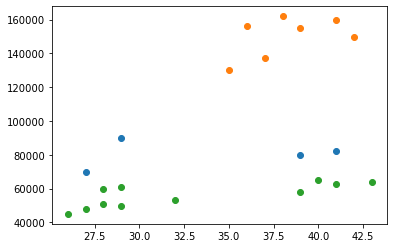

In [12]:
plt.scatter(df1["Age"],df1["Income($)"])
plt.scatter(df2["Age"],df2["Income($)"])
plt.scatter(df3["Age"],df3["Income($)"])

In [13]:
from sklearn.preprocessing import MinMaxScaler   # plot was not perfect thats why we use it

In [14]:
scaler =  MinMaxScaler()


In [15]:
print(type(scaler.fit(df["Age"])))

ValueError: Expected 2D array, got 1D array instead:
array=[27. 29. 29. 28. 42. 39. 41. 38. 36. 35. 37. 26. 27. 28. 29. 32. 40. 41.
 43. 39. 41. 39.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [16]:
print(type(scaler.fit_transform(df[["Age"]])))

<class 'numpy.ndarray'>


In [17]:
df["Income($)"] = scaler.fit_transform(df[["Income($)"]])

In [18]:
df.head()

,Name,Age,Income($),cluster
0,Rob,27,0.213675,0
1,Michael,29,0.384615,0
2,Mohan,29,0.136752,2
3,Ismail,28,0.128205,2
4,Kory,42,0.897436,1


In [19]:
y_prdict_new = km.fit_predict(df[["Age","Income($)"]])

In [20]:
df["cluster"] = y_prdict_new

In [21]:
df.head()

,Name,Age,Income($),cluster
0,Rob,27,0.213675,0
1,Michael,29,0.384615,0
2,Mohan,29,0.136752,0
3,Ismail,28,0.128205,0
4,Kory,42,0.897436,1


In [22]:
df1 = df[df["cluster"] ==0]
df2 = df[df["cluster"] == 1]
df3 = df[df["cluster"] == 2]

In [23]:
a = km.cluster_centers_
a

array([[28.33333333,  0.11633428],
       [40.55555556,  0.44824311],
       [36.5       ,  0.86538462]])

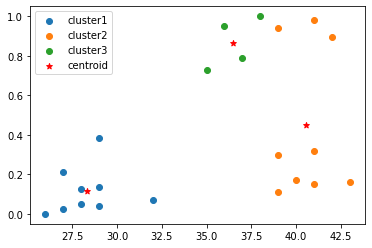

In [24]:
plt.scatter(df1["Age"],df1["Income($)"],label = "cluster1")
plt.scatter(df2["Age"],df2["Income($)"],label = "cluster2")
plt.scatter(df3["Age"],df3["Income($)"],label = "cluster3")
plt.scatter(a[:,0],a[:,1],marker = "*",color = "red",label = "centroid")
plt.legend()

In [ ]:
elbow plot

In [25]:
k_range = range(1,10)
sse = []
for i in k_range:
    km = KMeans(n_clusters=i)
    km.fit(df[["Age","Income($)"]])
    sse.append(km.inertia_)    

C:\Users\LENOVO\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [26]:
sse

[734.1763833270244,
 92.54628677464531,
 46.51741260217043,
 27.994497558867216,
 17.61742594418876,
 10.600399347407894,
 8.005754011736917,
 5.376994910755595,
 4.165735261889108]

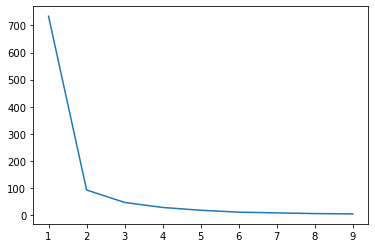

In [27]:
plt.plot(k_range,sse)   # from here we can conclude that elbow form at k = 3

In [ ]:

Clustering With K Means - Python Tutorial
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

Elbow Plot
sse = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df[['Age','Income($)']])
    sse.append(km.inertia_)
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)
[<matplotlib.lines.Line2D at 0x159c7a34978>]

Exercise


Use iris flower dataset from sklearn library and try to form clusters of flowers using petal width and length features. Drop other two features for simplicity.
Figure out if any preprocessing such as scaling would help here
Draw elbow plot and from that figure out optimal value of k

In [ ]:
Exercise


Use iris flower dataset from sklearn library and try to form clusters of flowers using petal width and length features. Drop other two features for simplicity.
Figure out if any preprocessing such as scaling would help here
Draw elbow plot and from that figure out optimal value of k

In [28]:
from sklearn.datasets import load_iris

In [29]:
iris = load_iris()

In [30]:
df =pd.DataFrame(iris.data,columns = iris.feature_names)

In [31]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [32]:
df_new = df.drop(["sepal length (cm)","sepal width (cm)"],axis =1)
df_new.head()

,petal length (cm),petal width (cm)
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2


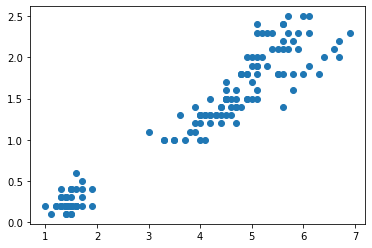

In [33]:
plt.scatter(df["petal length (cm)"],df["petal width (cm)"])

In [34]:
from sklearn.cluster import KMeans

In [35]:
km_range = range(1,10)
sse  = []
for i in km_range:
    km = KMeans(n_clusters = i)
    km.fit(df_new)
    sse.append(km.inertia_)

C:\Users\LENOVO\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


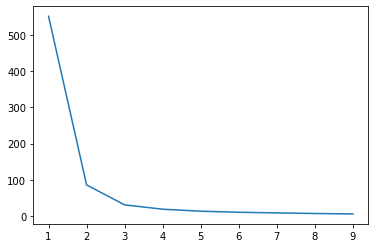

In [36]:
plt.plot(km_range,sse)

In [37]:
km = KMeans(n_clusters=3)
y_predict = km.fit_predict(df_new)

In [38]:
df_new["cluster"] = y_predict

In [39]:
df_new.head(51)

,petal length (cm),petal width (cm),cluster
0,1.4,0.2,0
1,1.4,0.2,0
2,1.3,0.2,0
3,1.5,0.2,0
4,1.4,0.2,0
5,1.7,0.4,0
6,1.4,0.3,0
7,1.5,0.2,0
8,1.4,0.2,0
9,1.5,0.1,0


In [40]:
df_new.tail(51)

,petal length (cm),petal width (cm),cluster
99,4.1,1.3,2
100,6.0,2.5,1
101,5.1,1.9,1
102,5.9,2.1,1
103,5.6,1.8,1
104,5.8,2.2,1
105,6.6,2.1,1
106,4.5,1.7,2
107,6.3,1.8,1
108,5.8,1.8,1


In [ ]:
use confusion matrix instead

In [41]:
df1 = df_new[df_new["cluster"] == 0]
df2 = df_new[df_new["cluster"] == 1]
df3 = df_new[df_new["cluster"] == 2]

In [43]:
a = km.cluster_centers_
a

array([[1.462     , 0.246     ],
       [5.59583333, 2.0375    ],
       [4.26923077, 1.34230769]])

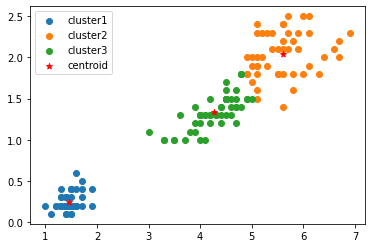

In [47]:
plt.scatter(df1["petal length (cm)"],df1["petal width (cm)"],label = "cluster1")
plt.scatter(df2["petal length (cm)"],df2["petal width (cm)"],label = "cluster2")
plt.scatter(df3["petal length (cm)"],df3["petal width (cm)"],label = "cluster3")
plt.scatter(a[:,0],a[:,1],marker = "*",color = "red",label = "centroid")
plt.legend()

In [ ]:
df

In [ ]:
# check by sepal length other process is same

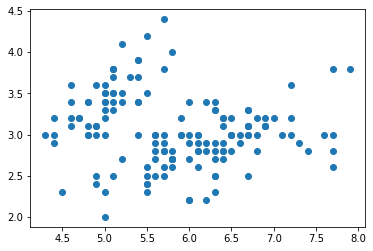

In [48]:
plt.scatter(df["sepal length (cm)"],df["sepal width (cm)"])

In [53]:
km_range = range(1,10)
sse  = []
for i in km_range:
    km = KMeans(n_clusters = i)
    km.fit(df[["sepal length (cm)"]],df[["sepal width (cm)"]])
    sse.append(km.inertia_)

C:\Users\LENOVO\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


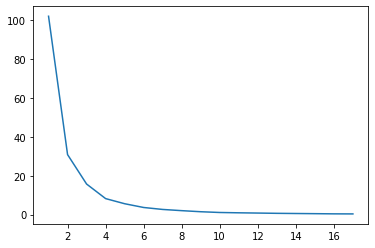

In [52]:
plt.plot(km_range,sse)